# Superconducting charge qubit simulation

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings

In [88]:
#From qutip.org
def hamiltonian_charge(N, Ec, Ej, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

In [89]:
#parameters
N=10
Ec=1
Ej = 1
lvl_num = 5
ng_array = np.linspace(-2,2,401)
energies = np.zeros((len(ng_array), 2*N+1))

In [90]:
#Spectrum
for idx_ng, ng in enumerate (ng_array):
    energies[idx_ng,:] = hamiltonian_charge(N, Ec, Ej, ng).eigenenergies()  

Text(0, 0.5, 'Frequency (GHz)')

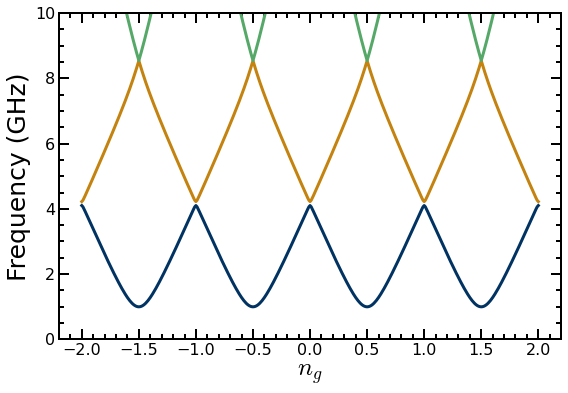

In [91]:
plt.figure(figsize=[9,6])
for idx_lvl in range(1,N):
    plt.plot(ng_array, energies[:,idx_lvl]-energies[:,0])
plt.ylim([0,10])
plt.xlabel('$n_g$')
plt.ylabel('Frequency (GHz)')

In [92]:
#Wavefunctions in charge basis
ng = 0
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0, 0.5, '$\\langle n|$3$ \\rangle $')

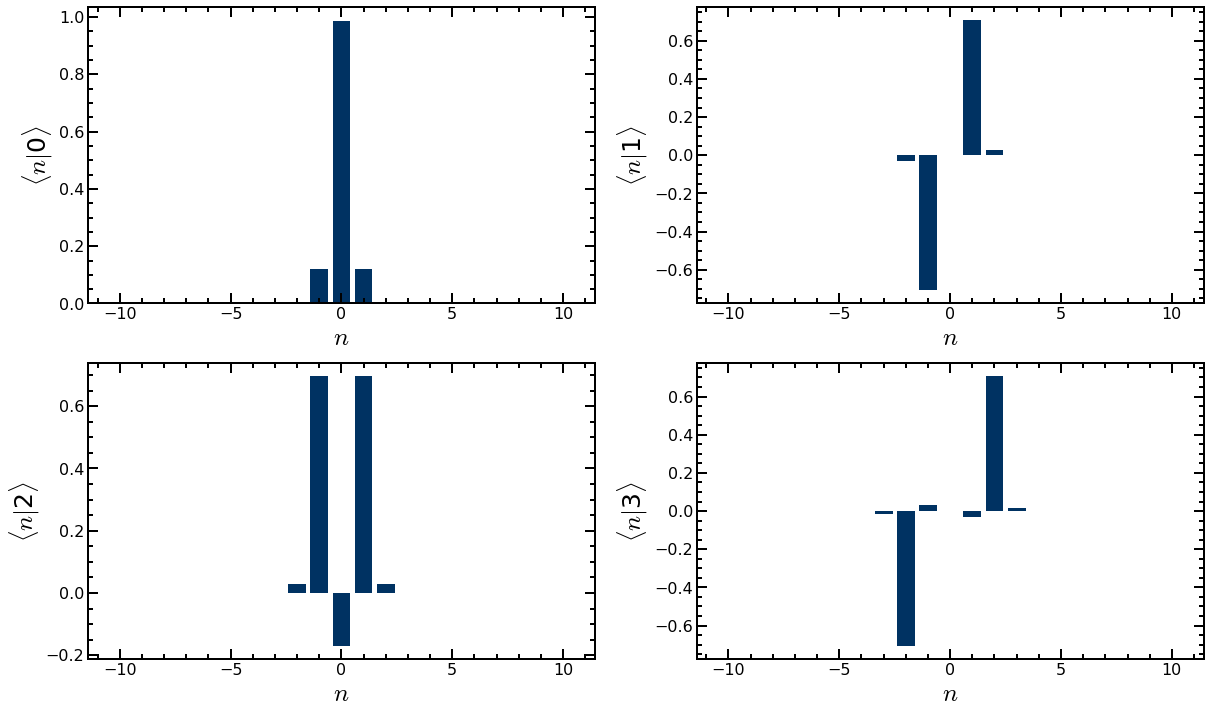

In [93]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(2,2, figsize = [20,12])

state_to_plot = 0
ax[0,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,0].set_xlabel('$n$')
ax[0,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 1
ax[0,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,1].set_xlabel('$n$')
ax[0,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 2
ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,0].set_xlabel('$n$')
ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 3
ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,1].set_xlabel('$n$')
ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

In [94]:
ng = 0.5
energies = np.zeros(2*N+1)
wavefunction = np.zeros((2*N+1, 2*N+1))
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   

/Users/longnguyen/opt/anaconda3/envs/qutip-env/lib/python3.8/site-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


Text(0, 0.5, '$\\langle n|$3$ \\rangle $')

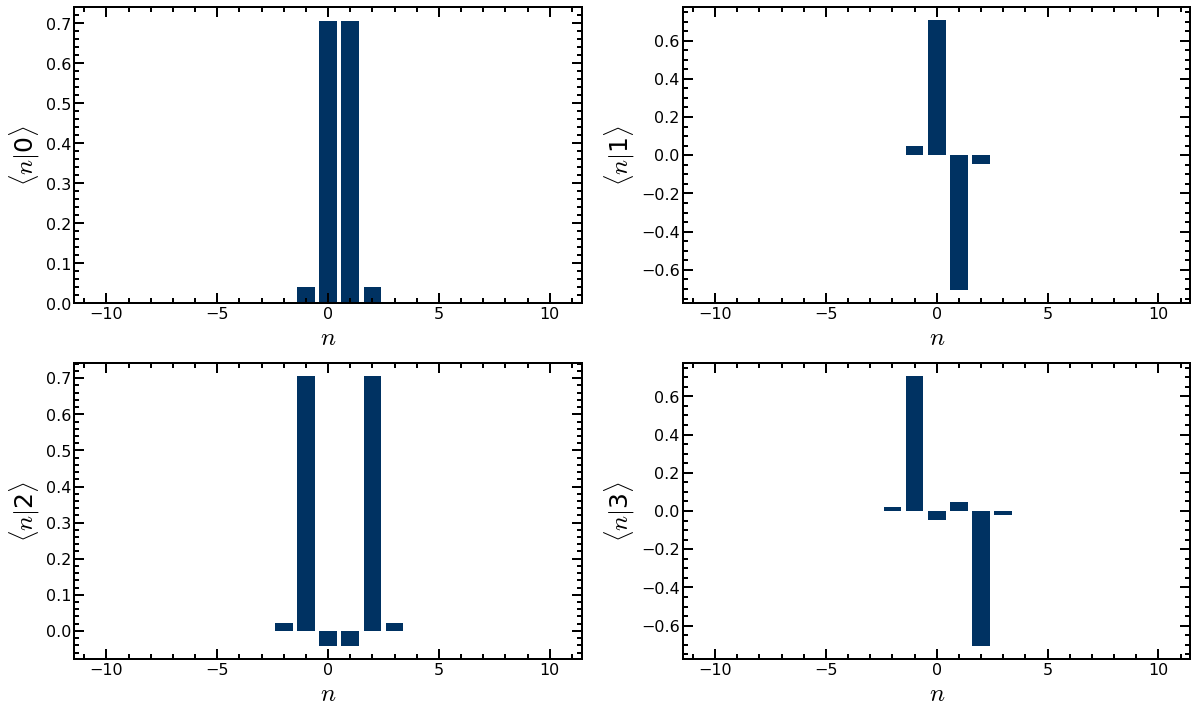

In [95]:
n = np.linspace(-N,N,2*N+1)
fig, ax = plt.subplots(2,2, figsize = [20,12])

state_to_plot = 0
ax[0,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,0].set_xlabel('$n$')
ax[0,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 1
ax[0,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[0,1].set_xlabel('$n$')
ax[0,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 2
ax[1,0].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,0].set_xlabel('$n$')
ax[1,0].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

state_to_plot = 3
ax[1,1].bar(n, wavefunction[state_to_plot].full()[:,0])
ax[1,1].set_xlabel('$n$')
ax[1,1].set_ylabel(r'$\langle n|$' + str(state_to_plot)+ r'$ \rangle $')

In [108]:
#Charge matrix elements
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(ng_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_ng] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_ng] = n.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$n_\\mathrm{ij}$')

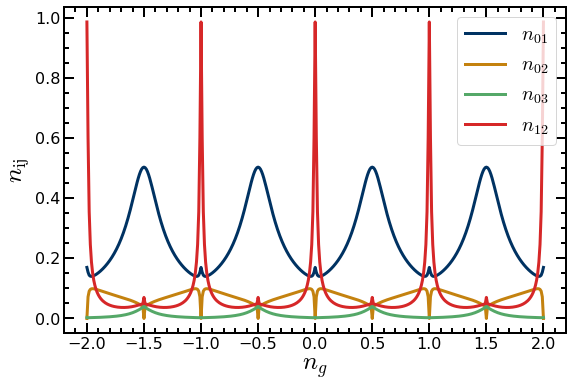

In [109]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(ng_array, abs(charge_matrix_element_02), label = '$n_{02}$')
plt.plot(ng_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(ng_array, abs(charge_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$n_\mathrm{ij}$')

In [110]:
#Phase matrix elements
phi = np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1)
phi = Qobj(phi)
phi_matrix_element_01 = np.zeros_like(charge_matrix_element_01)
phi_matrix_element_02 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_03 = np.zeros_like(phi_matrix_element_01)
phi_matrix_element_12 = np.zeros_like(phi_matrix_element_01)
for idx_ng, ng in enumerate(ng_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    phi_matrix_element_01[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[1])
    phi_matrix_element_02[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[2])
    phi_matrix_element_03[idx_ng] = phi.matrix_element(wavefunction[0], wavefunction[3])
    phi_matrix_element_12[idx_ng] = phi.matrix_element(wavefunction[1], wavefunction[2])

Text(0, 0.5, '$\\phi_\\mathrm{ij}$')

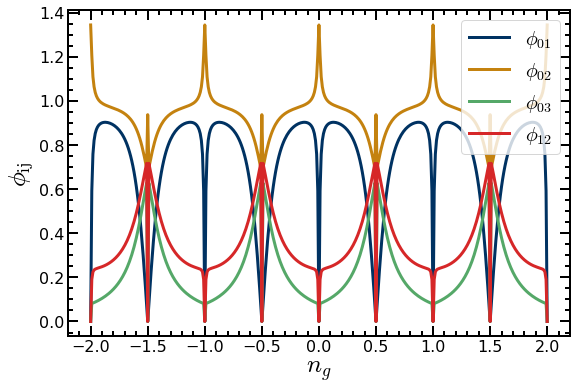

In [111]:
plt.figure(figsize = [9,6])
plt.plot(ng_array, abs(phi_matrix_element_01), label = '$\phi_{01}$')
plt.plot(ng_array, abs(phi_matrix_element_02), label = '$\phi_{02}$')
plt.plot(ng_array, abs(phi_matrix_element_03), label = '$\phi_{03}$')
plt.plot(ng_array, abs(phi_matrix_element_12), label = '$\phi_{12}$')
plt.legend()
plt.xlabel('$n_g$')
plt.ylabel('$\phi_\mathrm{ij}$')

In [112]:
#Sweep parameters
#Charge matrix elements in this case
ng = 0
Ej_array = np.linspace(1,100,1000)
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(Ej_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_Ej, Ej in enumerate(Ej_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_Ej] = n.matrix_element(wavefunction[1], wavefunction[2])


Text(0.5, 1.0, '$n_g=0$')

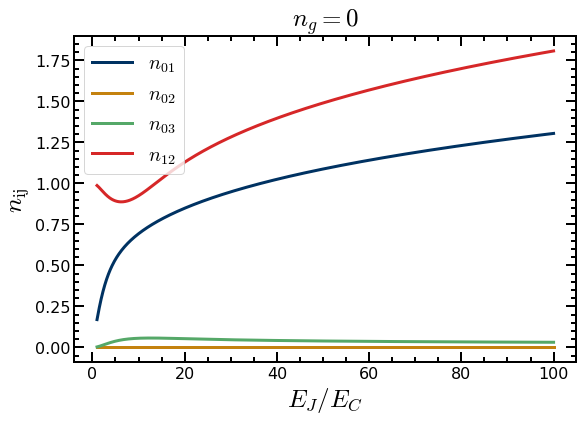

In [113]:
plt.figure(figsize = [9,6])
plt.plot(Ej_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(Ej_array, abs(charge_matrix_element_02), label = '$n_{02}$')
plt.plot(Ej_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(Ej_array, abs(charge_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$E_J/E_C$')
plt.ylabel('$n_\mathrm{ij}$')
plt.title('$n_g=0$')

In [114]:
#Sweep parameters
#Charge matrix elements in this case
ng = 0.5
Ej_array = np.linspace(1,100,1000)
n = np.diag(np.arange(-N,N+1))
n = Qobj(n)
charge_matrix_element_01 = np.zeros(len(Ej_array), dtype = complex)
charge_matrix_element_02 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_03 = np.zeros_like(charge_matrix_element_01)
charge_matrix_element_12 = np.zeros_like(charge_matrix_element_01)
for idx_Ej, Ej in enumerate(Ej_array):
    energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
    charge_matrix_element_01[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[1])
    charge_matrix_element_02[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[2])
    charge_matrix_element_03[idx_Ej] = n.matrix_element(wavefunction[0], wavefunction[3])
    charge_matrix_element_12[idx_Ej] = n.matrix_element(wavefunction[1], wavefunction[2])

Text(0.5, 1.0, '$n_g=0.5$')

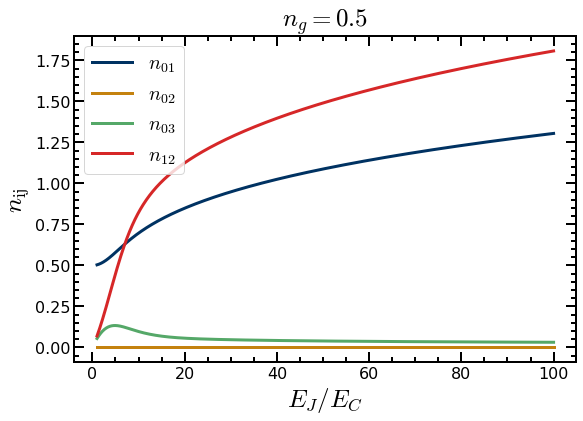

In [115]:
plt.figure(figsize = [9,6])
plt.plot(Ej_array, abs(charge_matrix_element_01), label = '$n_{01}$')
plt.plot(Ej_array, abs(charge_matrix_element_02), label = '$n_{02}$')
plt.plot(Ej_array, abs(charge_matrix_element_03), label = '$n_{03}$')
plt.plot(Ej_array, abs(charge_matrix_element_12), label = '$n_{12}$')
plt.legend()
plt.xlabel('$E_J/E_C$')
plt.ylabel('$n_\mathrm{ij}$')
plt.title('$n_g=0.5$')

In [259]:
#Wavefunction in phase basis by transformation from charge to phase
#Wavefunctions in charge basis
Ej = 8
Ec = 0.1
N = 100
ng = 0
energies, wavefunction = hamiltonian_charge(N, Ec, Ej, ng).eigenstates()   
phi = np.linspace(-np.pi, np.pi, 301)

n = np.arange(-N,N+1)
to_plot = 9
wavefunction_phase = np.zeros((len(phi), to_plot), dtype = complex)
for state_idx in range (to_plot):
    wFunc = np.zeros(len(phi))
    for lvl in range (2*N+1):
        coeff = (np.pi*2)**(-0.5)*np.real(wavefunction[state_idx].full()[lvl, 0])
        wFunc = wFunc + coeff*np.exp(1j*phi*n[lvl])
    wavefunction_phase [:,state_idx]=wFunc

(-2.0, 16.0)

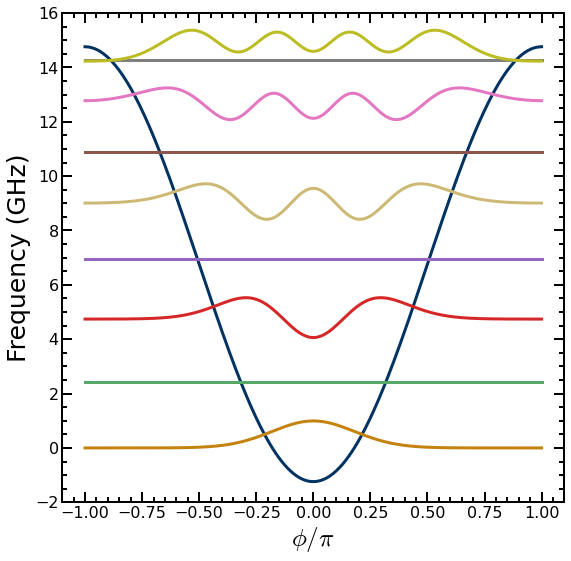

In [260]:
plt.figure(figsize = [9,9])
plt.plot (phi/np.pi, -Ej*np.cos(phi) - energies[0])
for state_idx in range(to_plot):
    plt.plot(phi/np.pi, np.real(wavefunction_phase[:,state_idx])+energies[state_idx] - energies[0])
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.ylim([-2,16])

In [262]:
#Solve in phase basis
Nphi = 601
Ej = 8
Ec = 0.1
ng = 0
phi = np.linspace(-np.pi,np.pi,2*Nphi+1)
# phi_op = diags(phi, 0, shape=(Nphi,Nphi), format='csr', dtype='complex128')
phi_op = np.diag(phi)
# print (phi_op)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
# n_op = diags([-dphi_coeff, dphi_coeff], [-1,1], shape=(2*Nphi+1,2*Nphi+1), dtype='complex')
# print (Qobj(n_op))
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
# print (Qobj(n_op))
# print (n_op.shape)
# print (phi_op.shape)
# phi_op = Qobj(phi_op)
# n_op = Qobj(n_op-ng)
def hamiltonian_phase(Ec, Ej, ng):
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*Qobj(phi_op).cosm()
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej, ng).eigenstates()

(-2.0, 16.0)

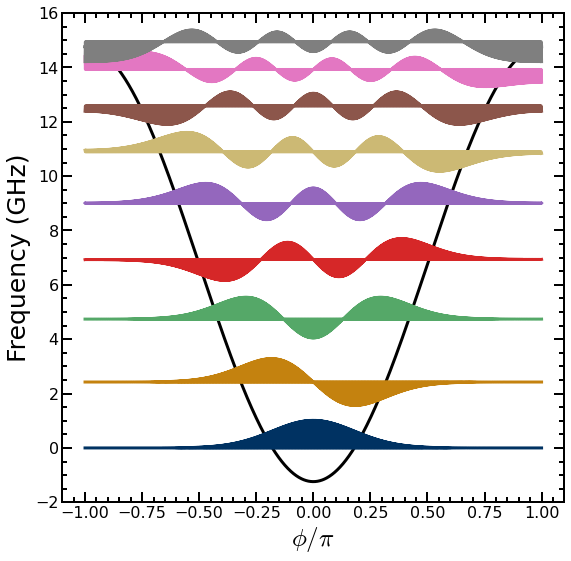

In [263]:
plt.figure(figsize =[9,9])
plt.plot(phi/np.pi, -Ej*np.cos(phi)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0]) 
plt.ylim([-2,16])
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.ylim([-2,16])